In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [90]:
df = pd.read_csv('/content/Loan_Default 2.csv')

In [91]:
#ukuran data
df.shape

(148670, 34)

In [92]:
#features
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [93]:
df.sample(10)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
75823,100713,2019,cf,Joint,nopre,type2,p3,l1,nopc,b/c,...,CIB,643,EXP,55-64,not_inst,79.454023,North,direct,1,36.0
114146,139036,2019,cf,Sex Not Available,pre,type1,p4,l1,nopc,nob/c,...,CRIF,615,CIB,45-54,to_inst,82.118056,south,direct,1,48.0
126632,151522,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,EXP,674,CIB,25-34,not_inst,75.429799,south,direct,1,46.0
33325,58215,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CRIF,766,EXP,65-74,to_inst,56.648936,North,direct,0,46.0
82585,107475,2019,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,...,CRIF,811,CIB,45-54,to_inst,73.840206,south,direct,0,42.0
140754,165644,2019,ncf,Sex Not Available,pre,type2,p1,l1,nopc,b/c,...,CRIF,799,CIB,65-74,to_inst,98.986486,south,direct,0,37.0
142919,167809,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,...,CRIF,657,EXP,45-54,to_inst,76.580460,North,direct,1,46.0
76888,101778,2019,NaN,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CRIF,842,EXP,55-64,to_inst,64.794686,central,direct,0,30.0
12871,37761,2019,cf,Female,nopre,type2,p1,l1,nopc,b/c,...,EXP,729,EXP,45-54,not_inst,80.032468,North,direct,0,55.0
13860,38750,2019,cf,Joint,nopre,type1,p1,l1,nopc,nob/c,...,CIB,726,EXP,55-64,not_inst,79.653285,south,direct,0,20.0


In [94]:
#check missing value
df.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [95]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values/len(df))*100

#Display missing values by percentage
missing_df = pd.DataFrame({'Percentage of Missing Values': missing_percentage})
missing_df = missing_df[missing_df['Percentage of Missing Values'] > 0].sort_values(by = 'Percentage of Missing Values', ascending = False)

print(missing_df)

                           Percentage of Missing Values
Upfront_charges                               26.664425
Interest_rate_spread                          24.644515
rate_of_interest                              24.509989
dtir1                                         16.224524
property_value                                10.155378
LTV                                           10.155378
income                                         6.154571
loan_limit                                     2.249277
approv_in_adv                                  0.610749
submission_of_application                      0.134526
age                                            0.134526
loan_purpose                                   0.090133
Neg_ammortization                              0.081388
term                                           0.027578


In [96]:
#check duplicate data
df.duplicated().sum()

np.int64(0)

In [97]:
#check data types
df.dtypes

,0
ID,int64
year,int64
loan_limit,object
Gender,object
approv_in_adv,object
loan_type,object
loan_purpose,object
Credit_Worthiness,object
open_credit,object
business_or_commercial,object


In [98]:
#drop irrelevant columns & high in missing value
columns_to_drop = ['ID', 'year','submission_of_application','Upfront_charges']
# Check which columns exist in the DataFrame before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_columns_to_drop, axis=1)

#EDA

In [99]:
import scipy.stats as stats

def check_plot(df, variable):
    # fungsi mengambil kerangka data dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [100]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'term',
       'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1'],
      dtype='object')

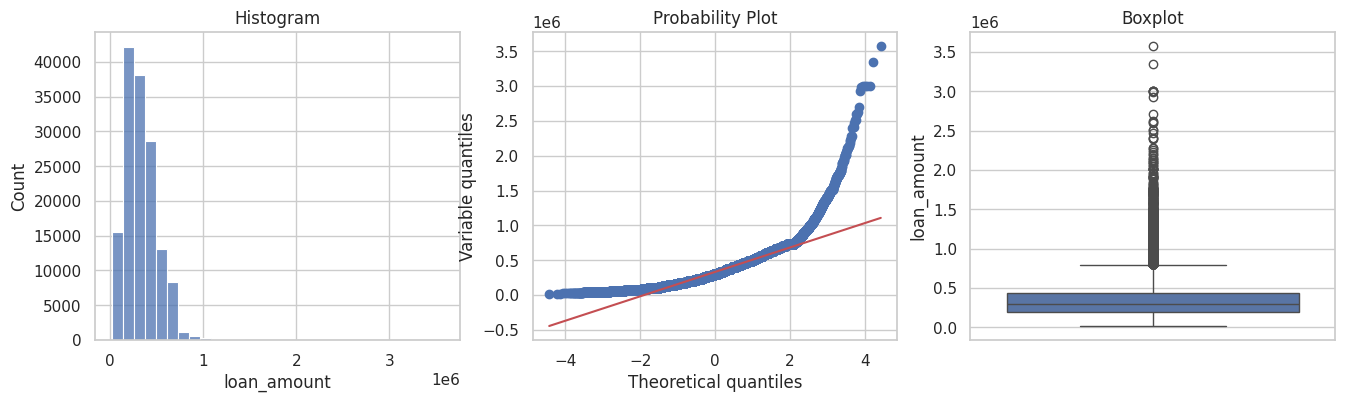

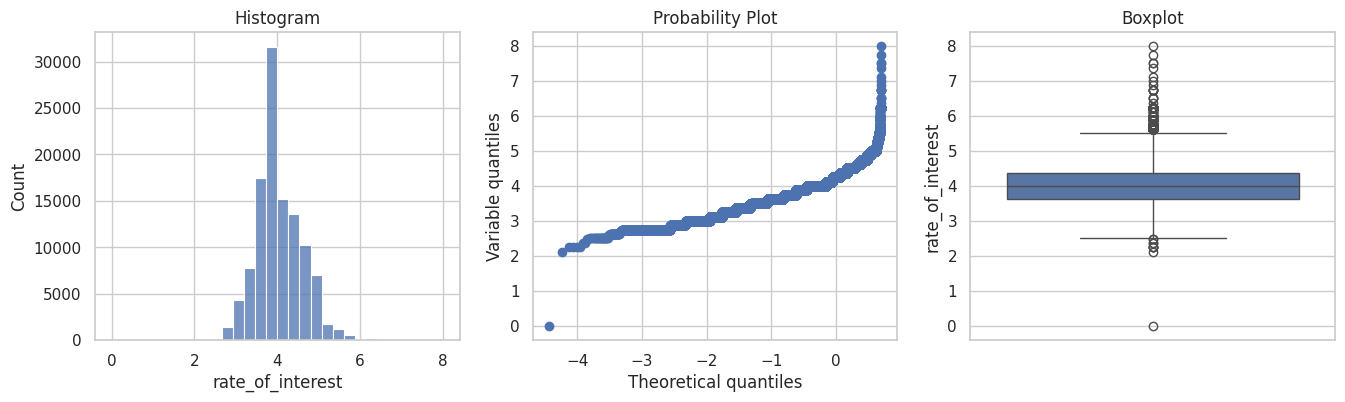

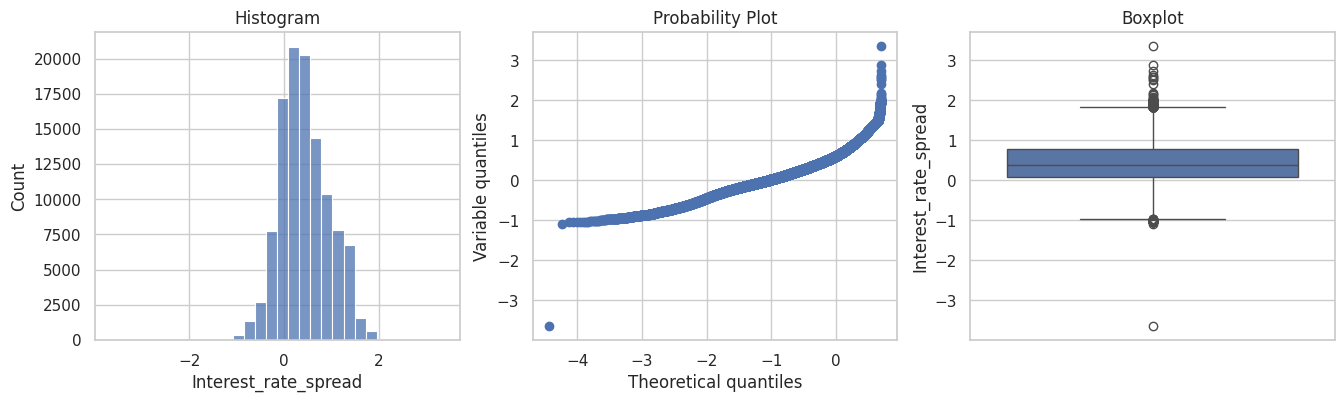

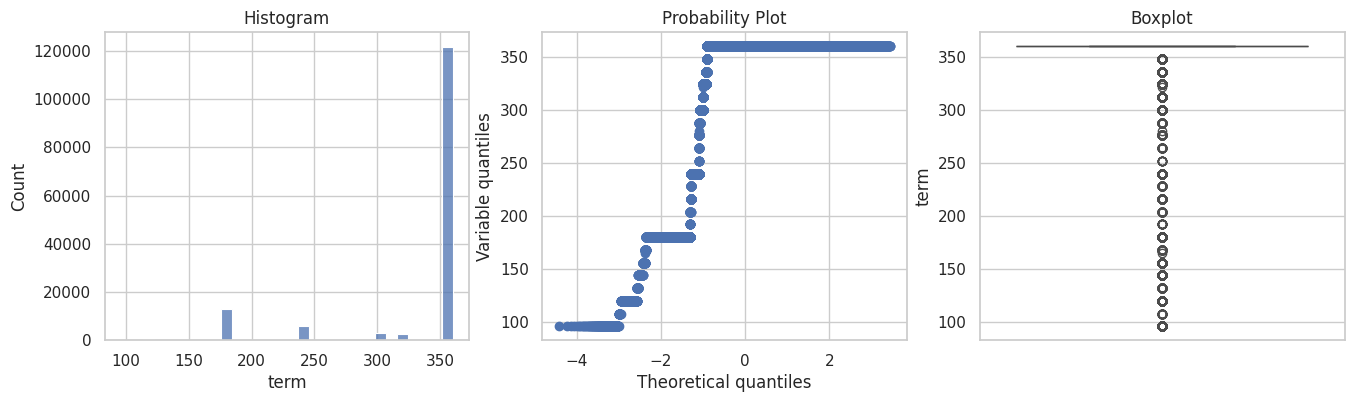

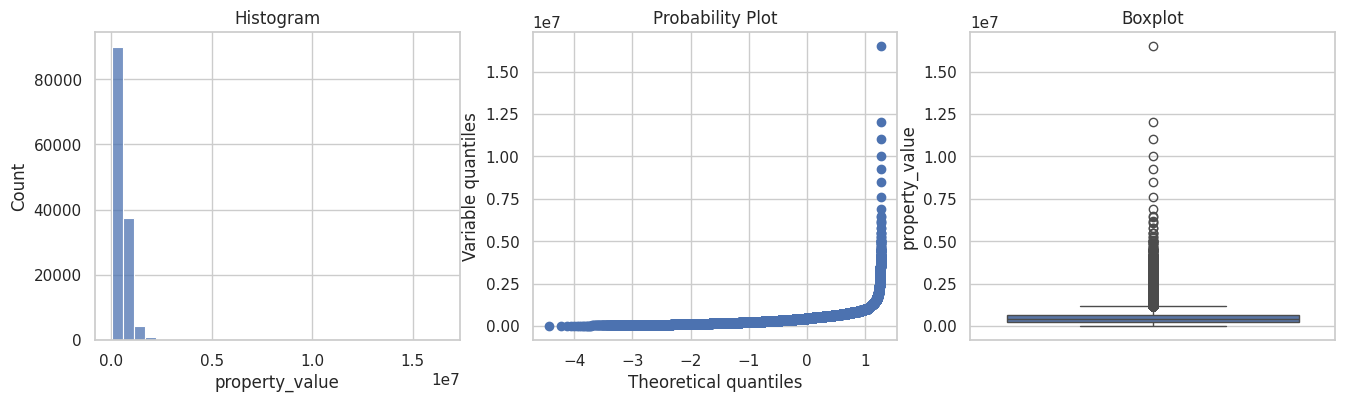

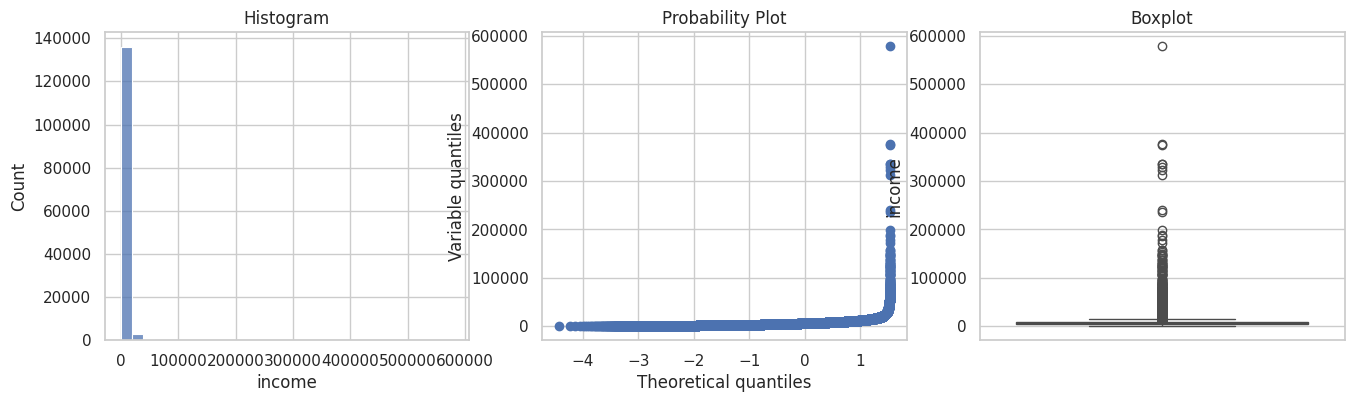

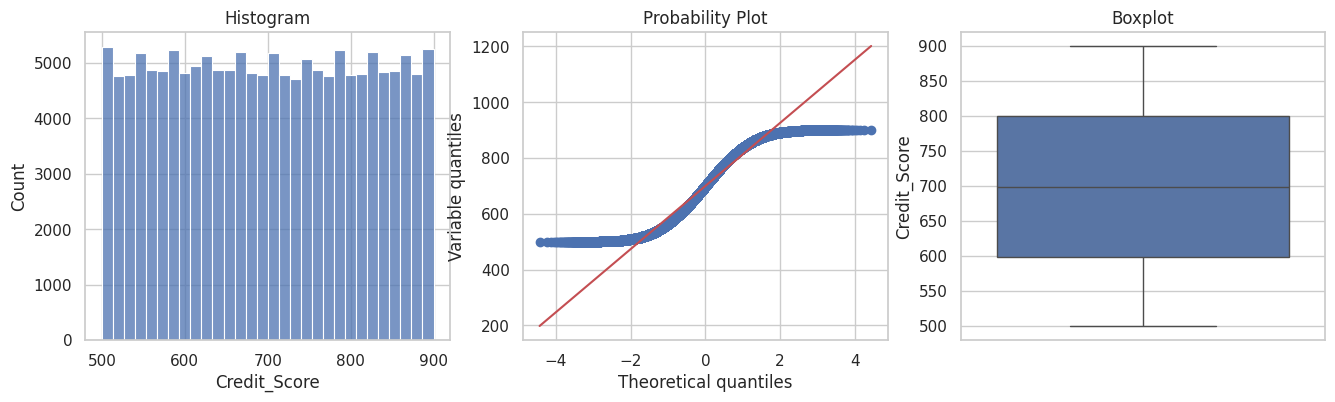

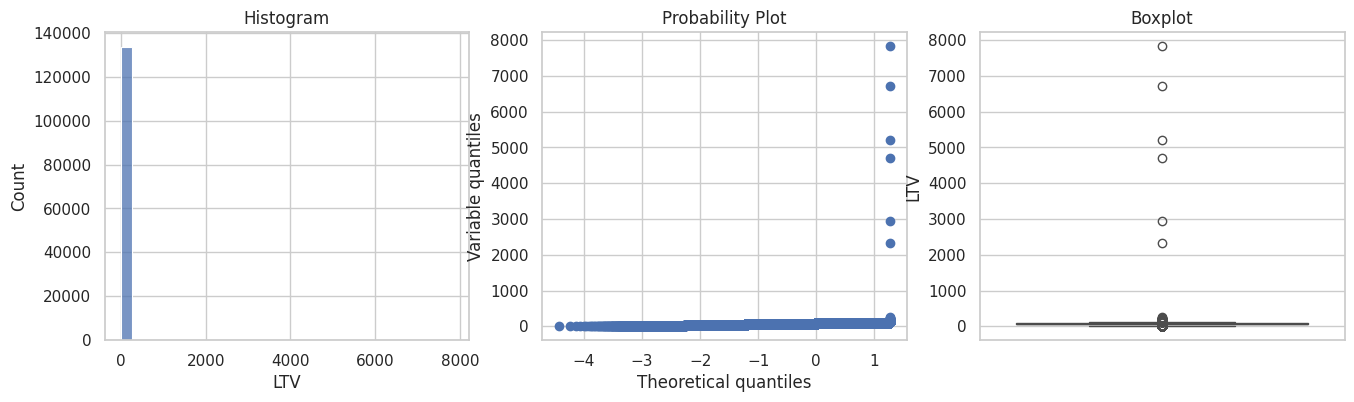

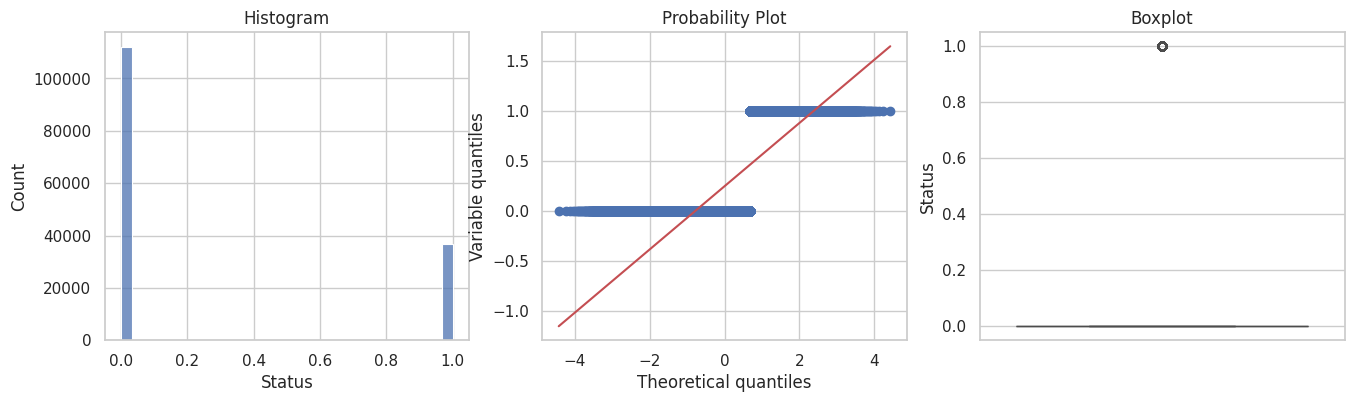

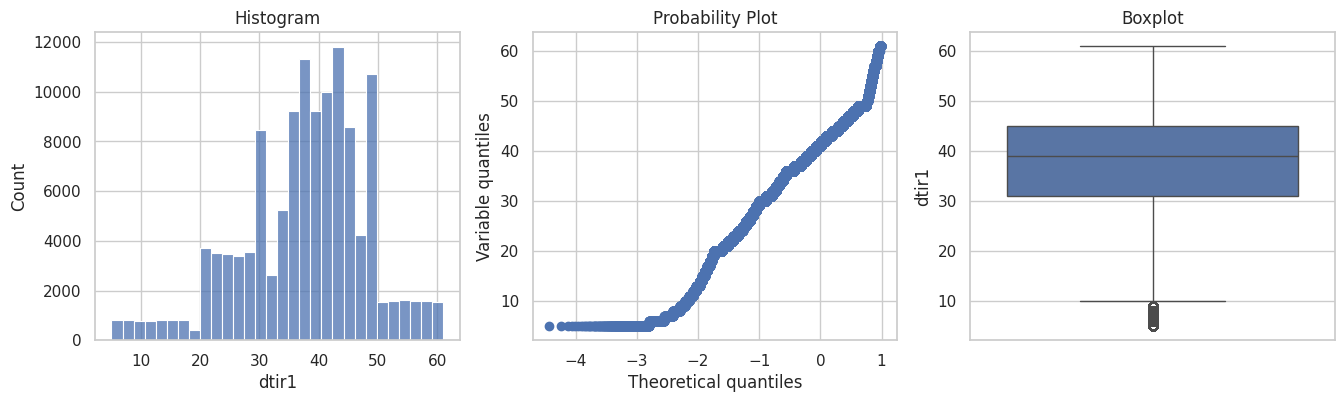

In [101]:
# Memvisualisasikan outlier hanya pada kolom numerik
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    check_plot(df, col)

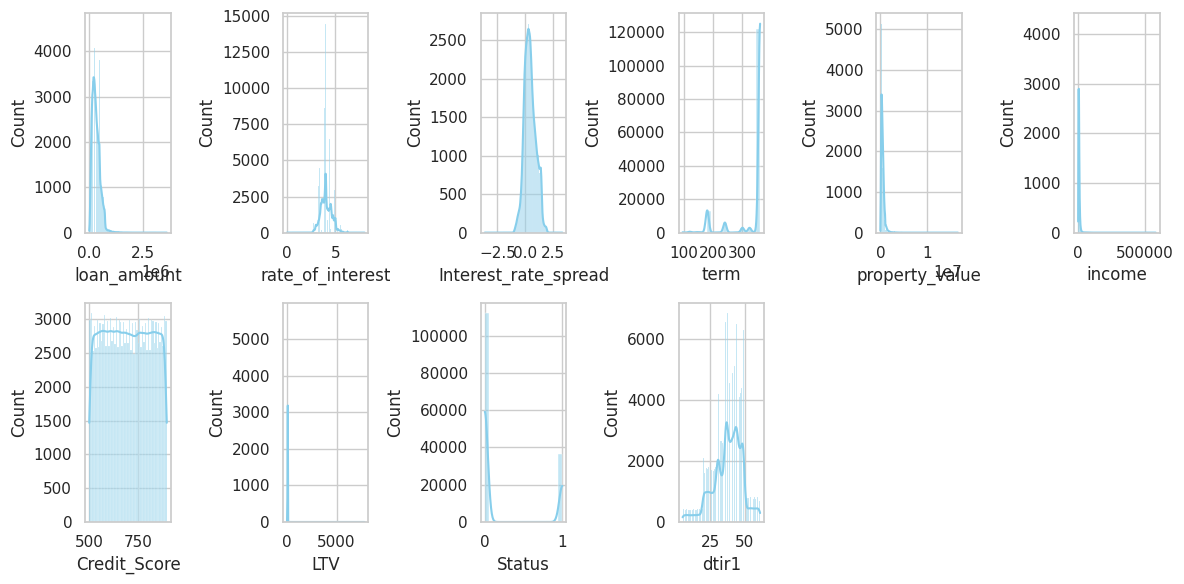

In [102]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numeric_columns
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='skyblue', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

#Function

In [103]:
def plot_boxplot_bivariate(data,  numerical_col, categorical_col = 'Status_str', title="Box Plot"):
    """
    Function to create a smaller box plot of a numerical variable grouped by a categorical variable.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    categorical_col (str): The name of the categorical column.
    numerical_col (str): The name of the numerical column.
    title (str): The title of the plot (optional).

    Returns:
    None: Displays the box plot.
    """
    plt.figure(figsize=(6, 4))  # Smaller figure size
    sns.boxplot(x=categorical_col, y=numerical_col, data=data)
    plt.title(title)
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.show()

In [104]:
def plot_count_distribution(data, column, title, xlabel, ylabel, figsize=(6, 4), palette="pastel", log_scale=False):
    # Setting the style and palette
    sns.set(style="whitegrid")

    # Urutkan kategori berdasarkan jumlah tertinggi
    order = data[column].value_counts().index

    # Customizing the countplot
    plt.figure(figsize=figsize)
    sns.countplot(x=data[column], order=order, palette=palette)

    # Adding a title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Log scale (opsional)
    if log_scale:
        plt.yscale('log')

    # Displaying the plot
    plt.tight_layout()
    plt.show()

In [105]:
def plot_count_distribution(data, column, title, xlabel, ylabel, figsize=(6, 4), palette="pastel", log_scale = False):
    # Setting the style and palette
    sns.set(style="whitegrid")

    # Customizing the countplot
    plt.figure(figsize=figsize)
    sns.countplot(x=data[column], palette=palette, edgecolor="black")
    # Adding a title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    if log_scale:
        plt.yscale('log')
    # Displaying the plot
    plt.show()


In [106]:
def plot_grouped_bar_chart(data, x_column, hue_column, default_label="Default", title="", xlabel="", ylabel="", figsize=(6, 4), palette="pastel", log_scale=False):
    sns.set(style="whitegrid")

    # Hitung jumlah hanya untuk baris dengan label default
    default_order = (
        data[data[hue_column] == default_label]
        .groupby(x_column)
        .size()
        .sort_values(ascending=False)
        .index
    )

    plt.figure(figsize=figsize)
    sns.countplot(
        data=data,
        x=x_column,
        hue=hue_column,
        palette=palette,
        order=default_order
    )

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    if log_scale:
        plt.yscale("log")

    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.show()

#Menghitung Status non default dan default

In [107]:
df.value_counts('Status' , normalize=True)*100

,proportion
Status,
0,75.355485
1,24.644515


In [109]:
#ubah 0 dan 1 menjadi non default dan default untuk visualisasi
df['Status_str'] = df['Status'].replace({0:'Non default', 1:'Default'})

/tmp/ipython-input-105-3323485107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


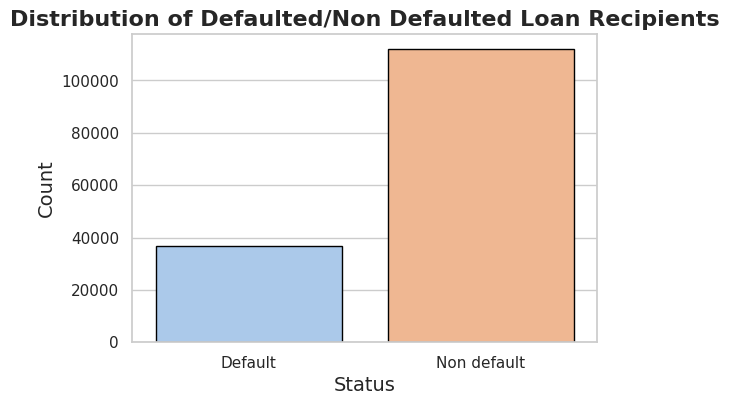

In [110]:
plot_count_distribution(data=df,
                        column='Status_str',
                        title='Distribution of Defaulted/Non Defaulted Loan Recipients',
                        xlabel='Status',
                        ylabel='Count'
                       )

/tmp/ipython-input-111-649302830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=status_percent, x='Status_str', y='Percentage', palette='pastel')


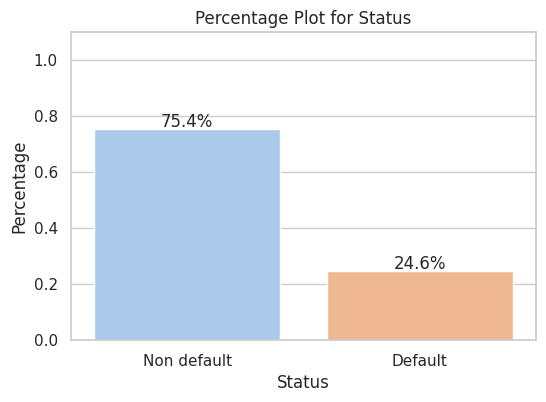

In [111]:
# Hitung proporsi default dan non default (dalam %)
status_percent = df['Status_str'].value_counts(normalize=True).reset_index()
status_percent.columns = ['Status_str', 'Percentage']

plt.figure(figsize=(6, 4))
sns.barplot(data=status_percent, x='Status_str', y='Percentage', palette='pastel')

plt.title("Percentage Plot for Status")
plt.xlabel("Status")
plt.ylabel("Percentage")

# Tambahkan label persentase di atas bar
for index, row in status_percent.iterrows():
    plt.text(index, row['Percentage'] + 0.01, f"{row['Percentage']*100:.1f}%", ha='center')

plt.ylim(0, 1.1)  # Supaya ruang label cukup
plt.show()

#gender

/tmp/ipython-input-105-3323485107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


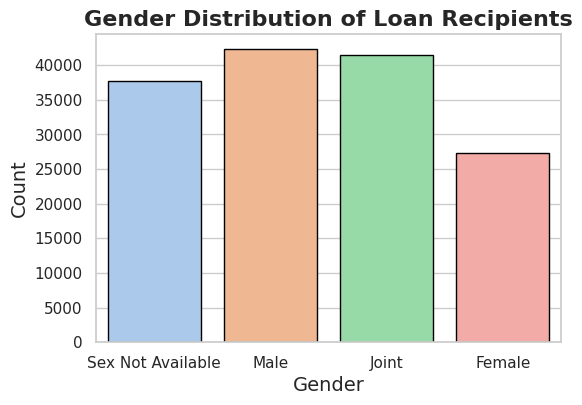

In [112]:
plot_count_distribution(data=df,
                        column='Gender',
                        title='Gender Distribution of Loan Recipients',
                        xlabel='Gender',
                        ylabel='Count')

In [113]:
cross_tab = pd.crosstab(df['Gender'], df['Status_str'])

# Calculate the percentage of Defaulted ones
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tabylabel='Count'


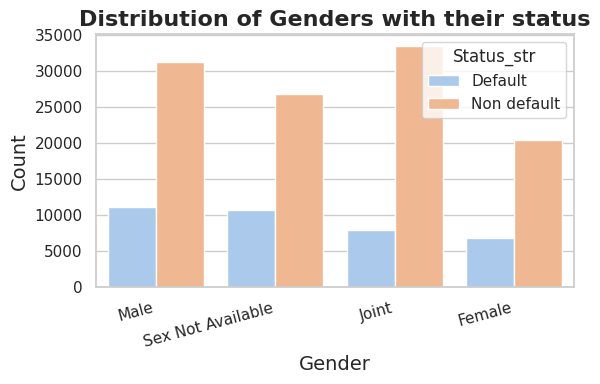

In [114]:
plot_grouped_bar_chart(
    data=df,
    x_column='Gender',
    title='Distribution of Genders with their status',
    xlabel='Gender',
    hue_column='Status_str',
    ylabel='Count'
)

#age

/tmp/ipython-input-105-3323485107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette=palette, edgecolor="black")


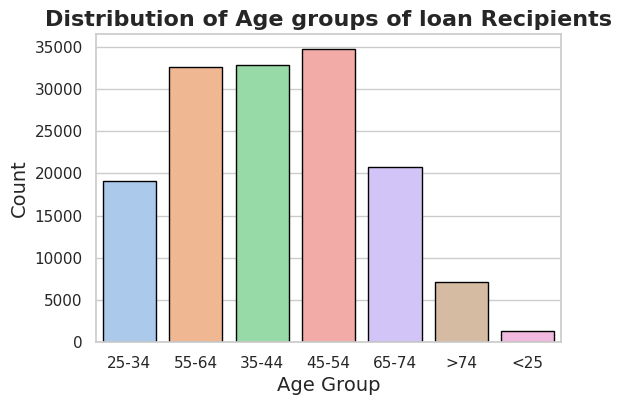

In [115]:
plot_count_distribution(data=df,
                        column='age',
                        title='Distribution of Age groups of loan Recipients',
                        xlabel='Age Group',
                        ylabel='Count'
                       )

In [116]:
cross_tab = pd.crosstab(df['age'], df['Status_str'])

# Calculate the percentage of Defaulted ones
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default']+cross_tab['Default'])) * 100).round(2).astype(str) + '%'
cross_tab

Status_str,Default,Non default,Percentage_defaulted
age,,,
25-34,4248,14894,22.19%
35-44,7309,25509,22.27%
45-54,8349,26371,24.05%
55-64,8422,24112,25.89%
65-74,5571,15173,26.86%
<25,387,950,28.95%
>74,2153,5022,30.01%


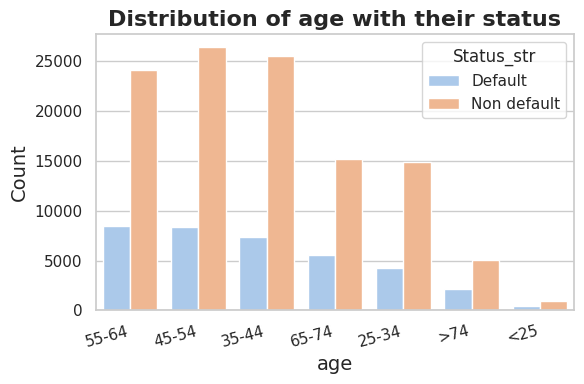

In [117]:
plot_grouped_bar_chart(
    data=df,
    x_column='age',
    hue_column='Status_str',
    title='Distribution of age with their status',
    xlabel='age',
    ylabel='Count'
)

#loan amount

In [118]:
df.groupby('Status_str')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Status_str,,,,,,,,
Default,36639.0,319275.184912,208576.810054,16500.0,176500.0,276500.0,416500.0,3576500.0
Non default,112031.0,334990.774875,174916.570573,26500.0,206500.0,306500.0,446500.0,3006500.0


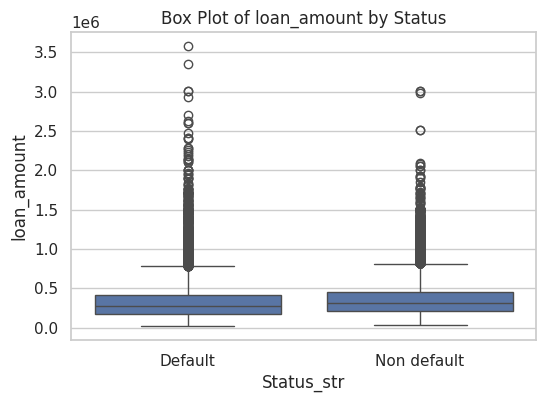

In [119]:
plot_boxplot_bivariate(df, 'loan_amount', title="Box Plot of loan_amount by Status")

#income

In [120]:
df.groupby('Status_str')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
Status_str,,,,,,,,
Default,35400.0,6231.806780,7247.649876,0.0,3000.0,4860.0,7620.0,578580.0
Non default,104120.0,7204.014214,6201.339600,0.0,4020.0,6000.0,8760.0,377220.0


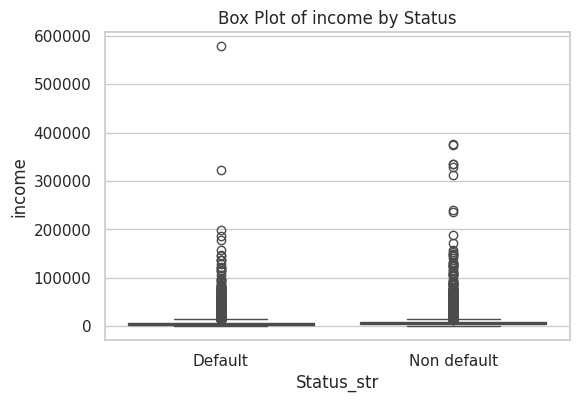

In [121]:
plot_boxplot_bivariate(df, 'income', title="Box Plot of income by Status")

#loan purpose

In [122]:
df['loan_purpose'].value_counts()

,count
loan_purpose,
p3,55934
p4,54799
p1,34529
p2,3274


In [123]:
#define every type
df['loan_purpose_type'] = df['loan_purpose'].replace({
    'p1': 'Property',
    'p2': 'Debt Consolidation',
    'p3': 'Business',
    'p4': 'Personal'})

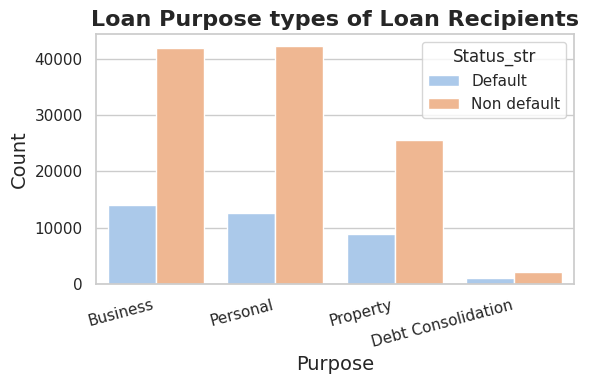

In [124]:
plot_grouped_bar_chart(
    data=df,
    x_column='loan_purpose_type',
    title='Loan Purpose types of Loan Recipients',
    hue_column='Status_str',
    xlabel='Purpose',
    ylabel='Count',
)

#region

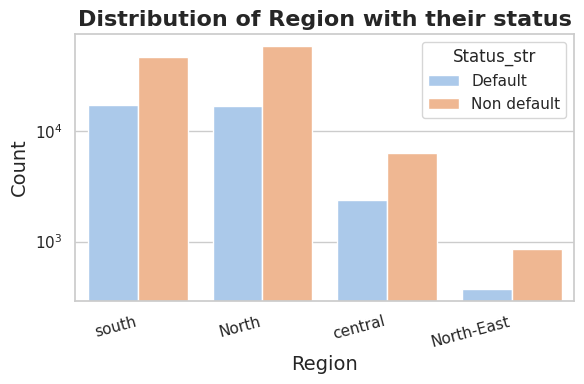

In [125]:
plot_grouped_bar_chart(
    data=df,
    x_column='Region',
    title='Distribution of Region with their status',
    hue_column='Status_str',
    xlabel='Region',
    ylabel='Count',
    log_scale = True
)

#credit worthiness

In [126]:
df['Credit_Worthiness'].value_counts()

,count
Credit_Worthiness,
l1,142344
l2,6326


In [127]:
df['Credit_Worthiness_Type'] = df['Credit_Worthiness'].replace({
    'l1': 'Low Risk',
    'l2': 'Medium Risk'
})

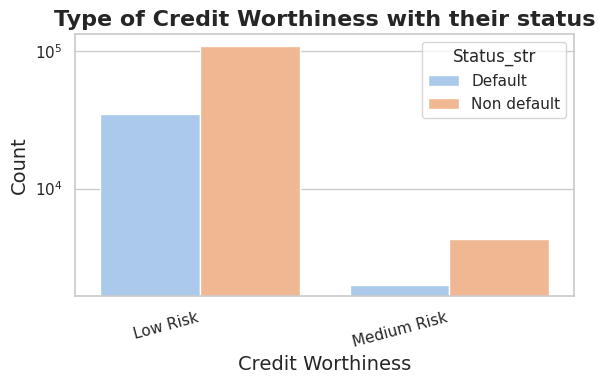

In [128]:
plot_grouped_bar_chart(
    data=df,
    x_column='Credit_Worthiness_Type',
    title='Type of Credit Worthiness with their status',
    hue_column='Status_str',
    xlabel='Credit Worthiness',
    ylabel='Count',
    log_scale = True
)

In [129]:
df['Interest_rate_spread'].value_counts()

,count
Interest_rate_spread,
-0.0280,77
-0.0380,64
-0.0230,60
-0.1730,56
-0.1480,52
...,...
1.3146,1
-0.4772,1
1.6404,1


In [130]:
df['Status'].corr(df['Interest_rate_spread'])

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


np.float64(nan)

In [131]:
df['Interest_rate_spread'].nunique()


22516

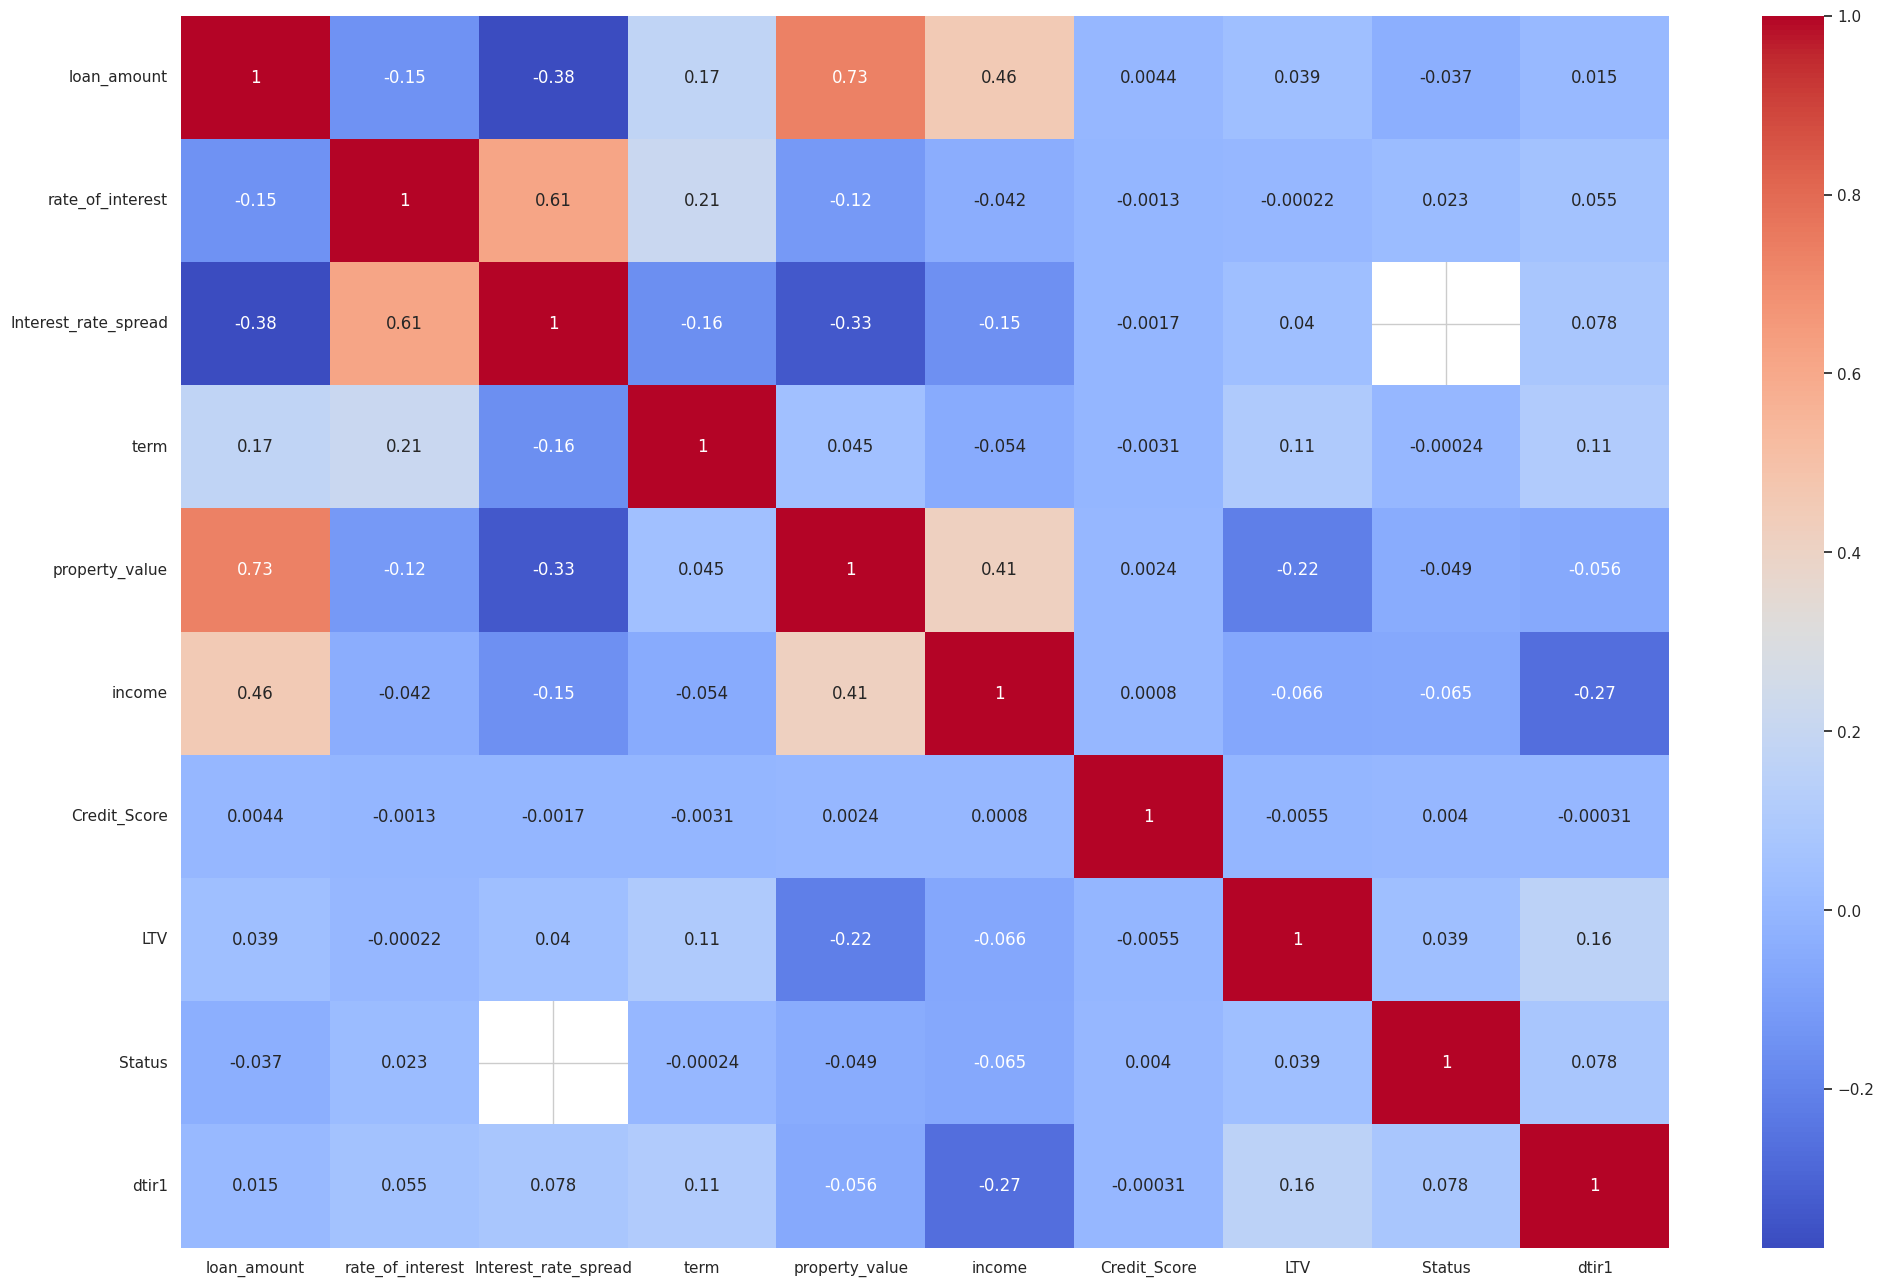

In [132]:
#heatmap correlation betwen features
#  Get the data types of each column
column_types = df.dtypes

# Select only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Create a correlation matrix for the numeric columns
c = numeric_columns.corr()

# Create a correlation heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.show()

In [133]:
#drop features dengan multicol tinggi 'Interest_rate_spread'd dan 'property_value'
df = df.drop(columns=['Interest_rate_spread','property_value'],axis=1)